## Sorting Contours

We can sort contours in many ways.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


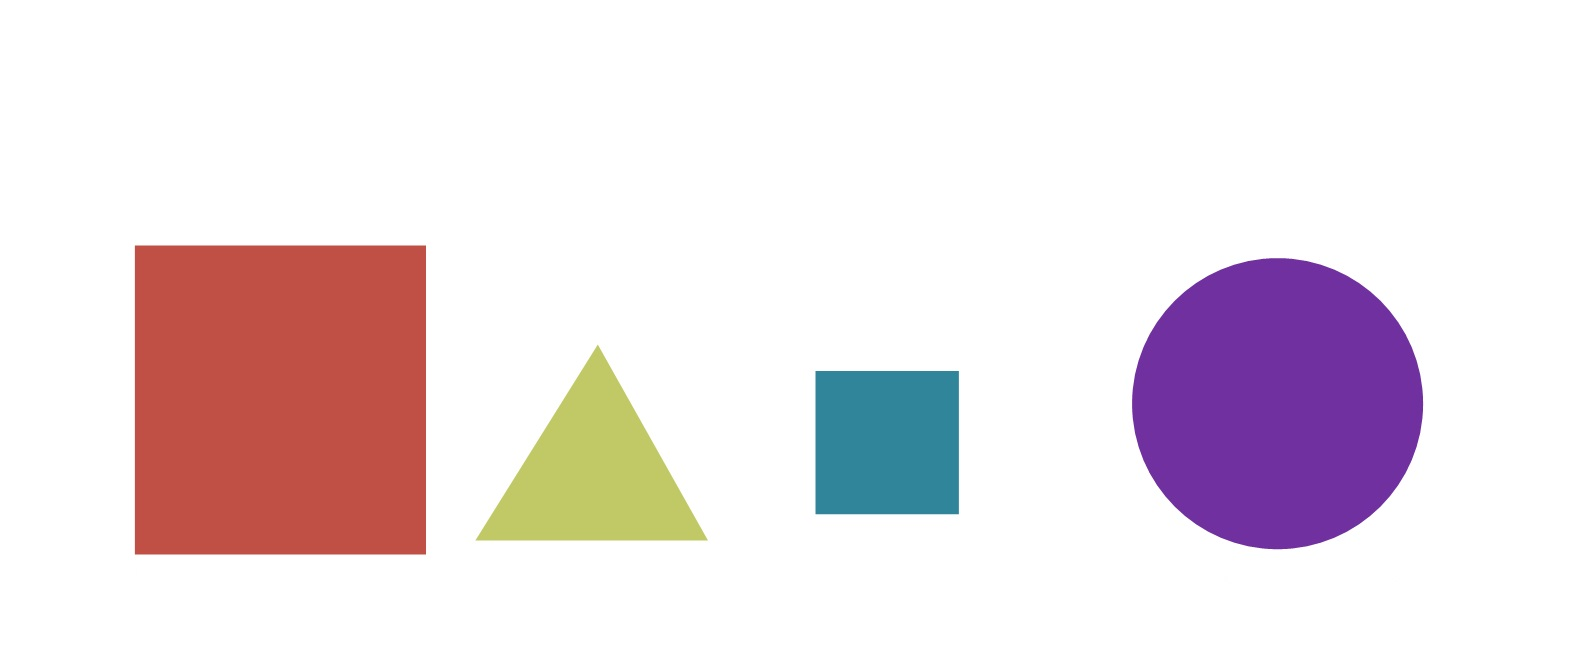

-1

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load our image
# image = cv2.imread('images/bunchofshapes.jpg')
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/bunchofshapes.jpg')
cv2_imshow(image)
cv2.waitKey()


In [ ]:
#create a black imge with same diamensions as our loadinf image 
blank_image=np.zeros((image.shape[0],image.shape[1], 3))
# cv2_imshow(blank_image)
#create copy of original image
original_image=image

#gray scale our image
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#find canny edges
edges=cv2.Canny(gray,50,200)
cv2_imshow(edges)

In [11]:
#find contour and print how amny whrer found
contour,hierarchy=cv2.findContours(edges.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print("number of countours",len(contour))

number of countours 4


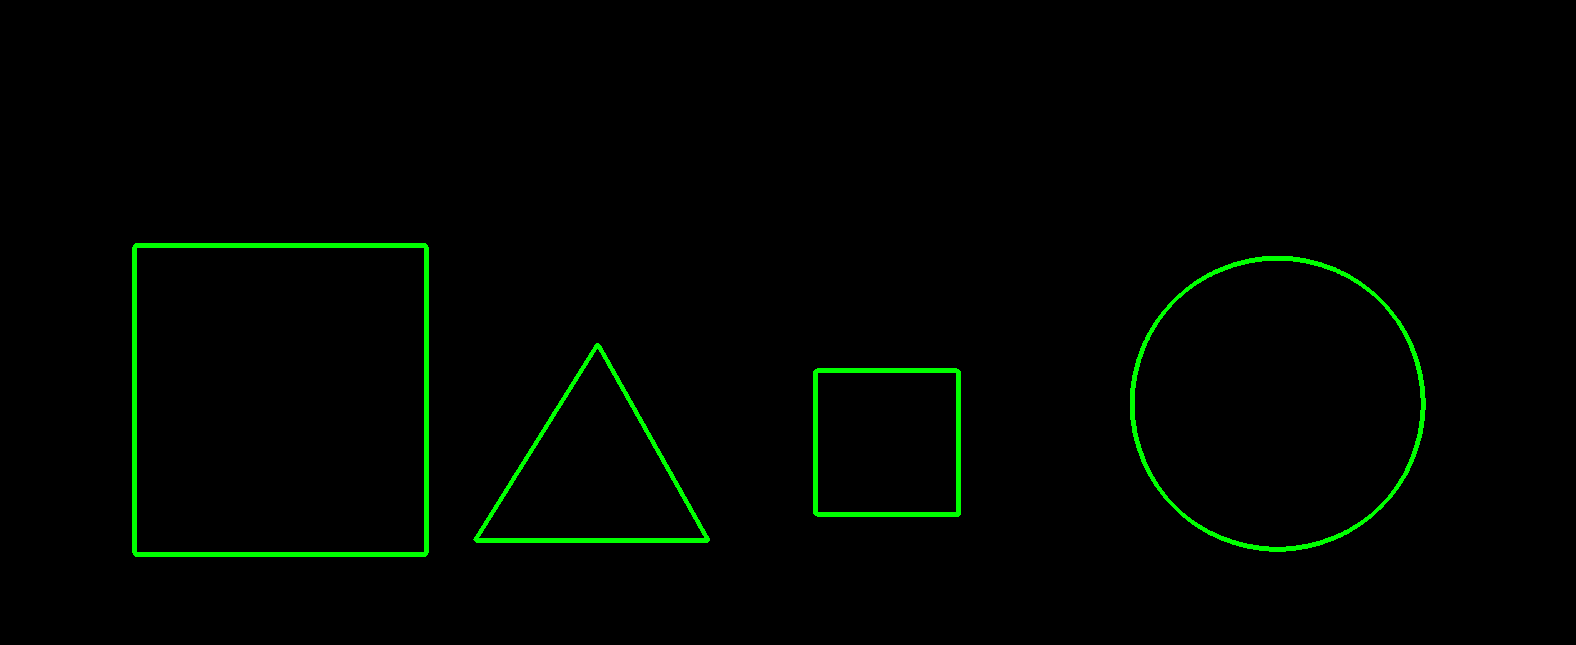

In [14]:
#draw all countours 
cv2.drawContours(blank_image,contour,-1,(0,255,0),3)
cv2_imshow(blank_image)

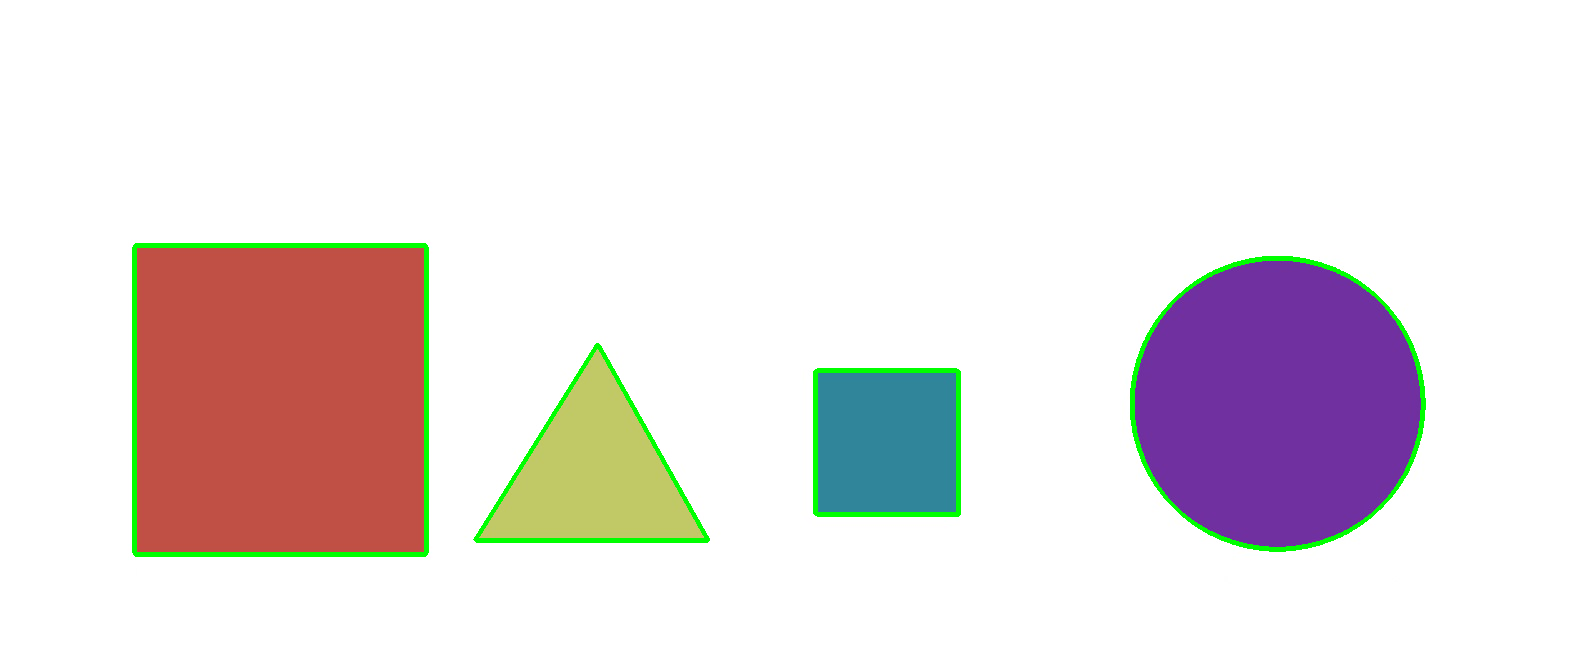

In [15]:
#draw contour on original image
cv2.drawContours(image,contour,-1,(0,255,0),3)
cv2_imshow(image)


In [16]:

# # Create a black image with same dimensions as our loaded image
# blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# # Create a copy of our original image
# orginal_image = image

# # Grayscale our image
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# # Find Canny edges
# edged = cv2.Canny(gray, 50, 200)
# cv2.imshow('1 - Canny Edges', edged)
# cv2.waitKey(0)

# # Find contours and print how many were found
# contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# print ("Number of contours found = ", len(contours))

# #Draw all contours
# cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)
# cv2.imshow('2 - All Contours over blank image', blank_image)
# cv2.waitKey(0)

# # Draw all contours over blank image
# cv2.drawContours(image, contours, -1, (0,255,0), 3)
# cv2.imshow('3 - All Contours', image)
# cv2.waitKey(0)

cv2.destroyAllWindows()

## Sort Contours by Area

In [ ]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
# image = cv2.imread('images/bunchofshapes.jpg')
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/bunchofshapes.jpg')
orginal_image = image

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting")
print(get_contour_areas(contour))

# Sort contours large to small
sorted_contours = sorted(contour, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print("Contor Areas after sorting") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for c in sorted_contours:
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
    cv2.waitKey(0)
    cv2_imshow(orginal_image)

cv2.waitKey()
cv2.destroyAllWindows()

# Sorting Contours Left to Right

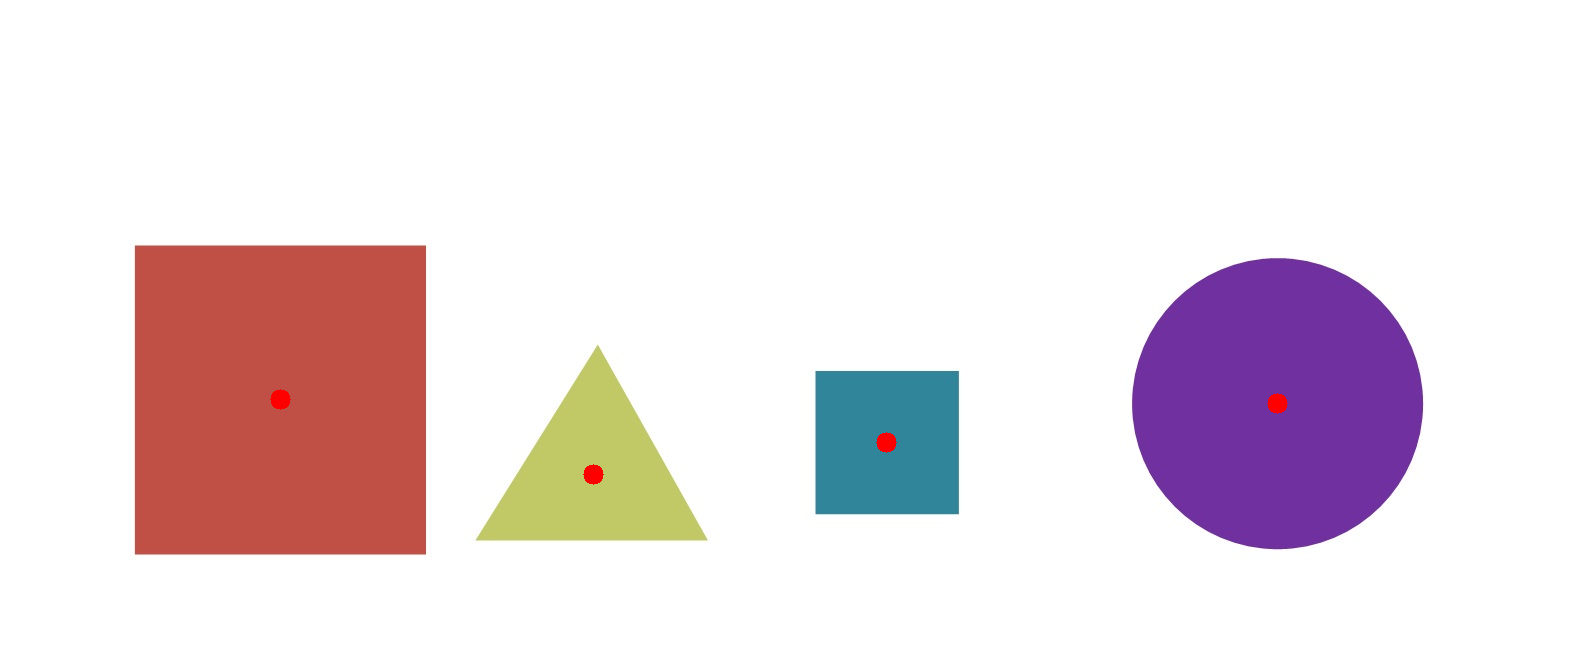

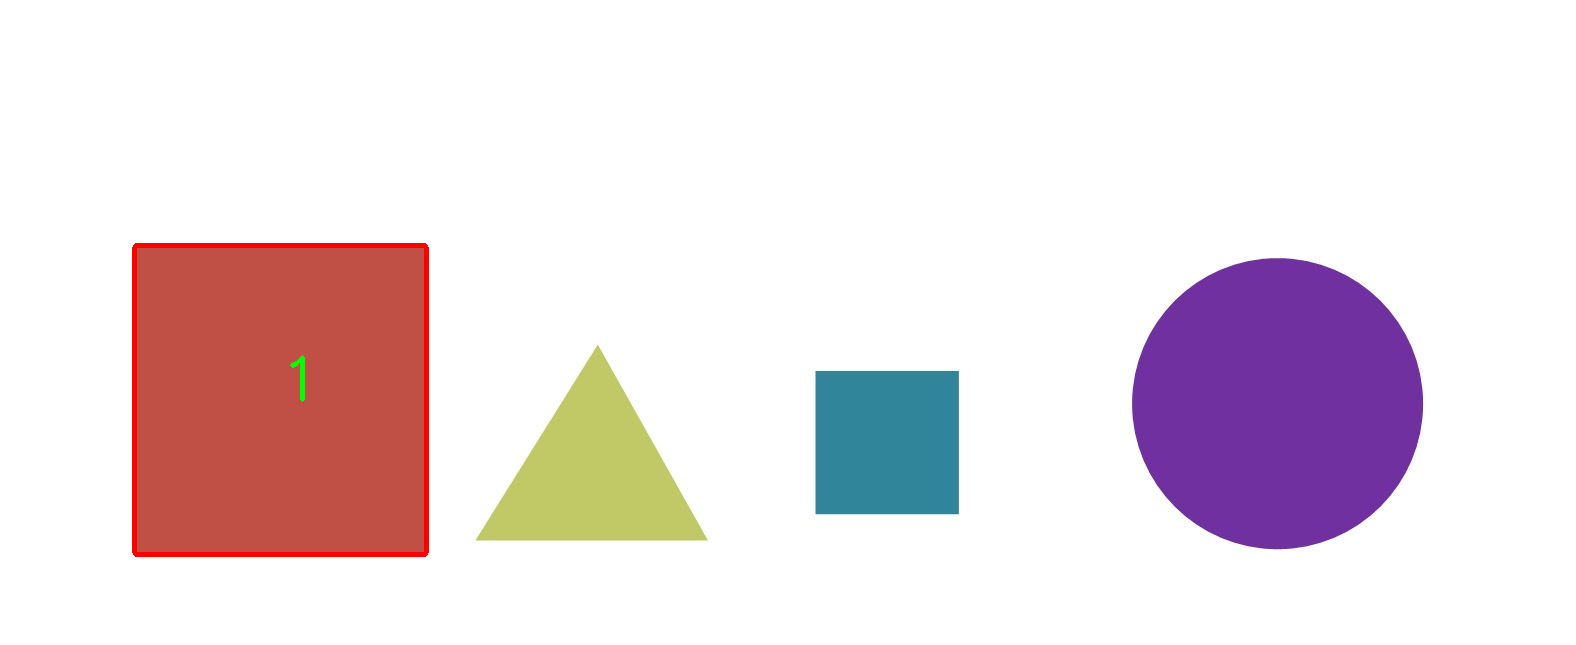

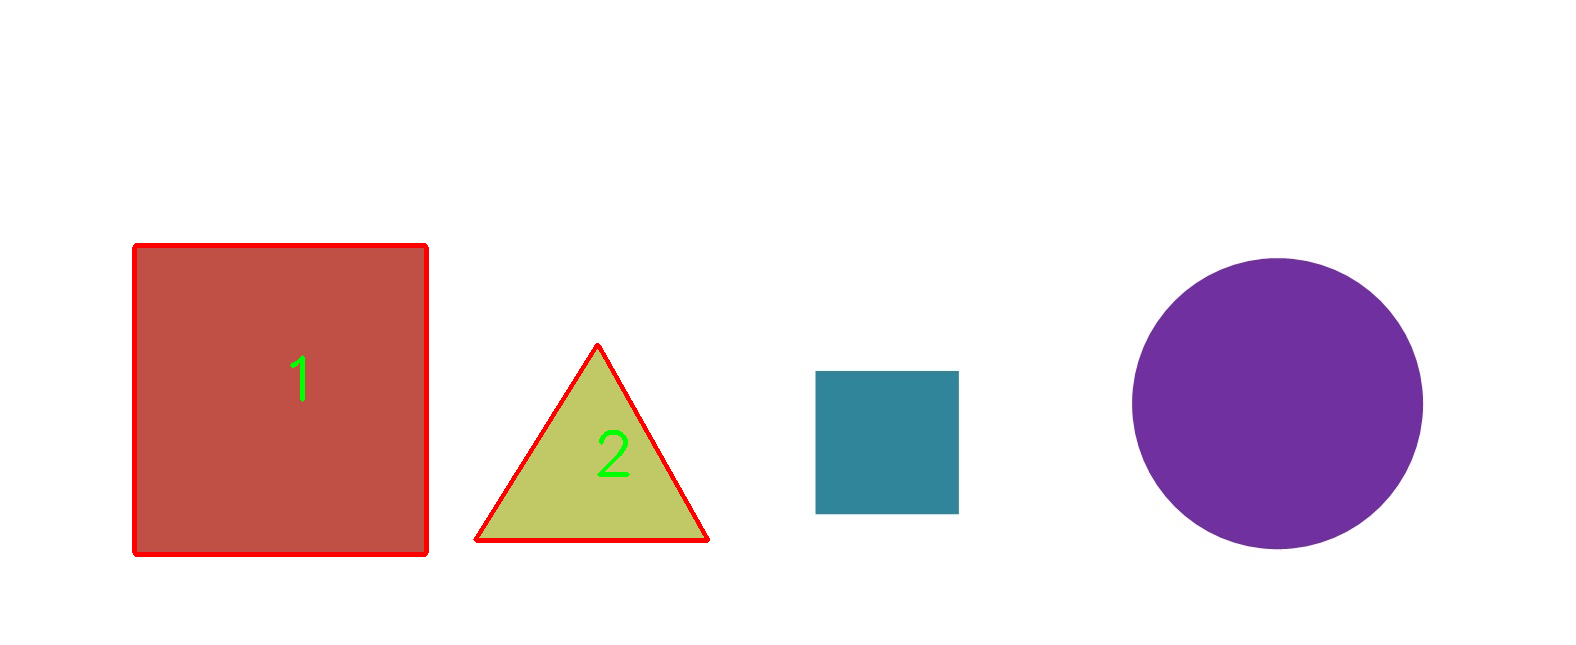

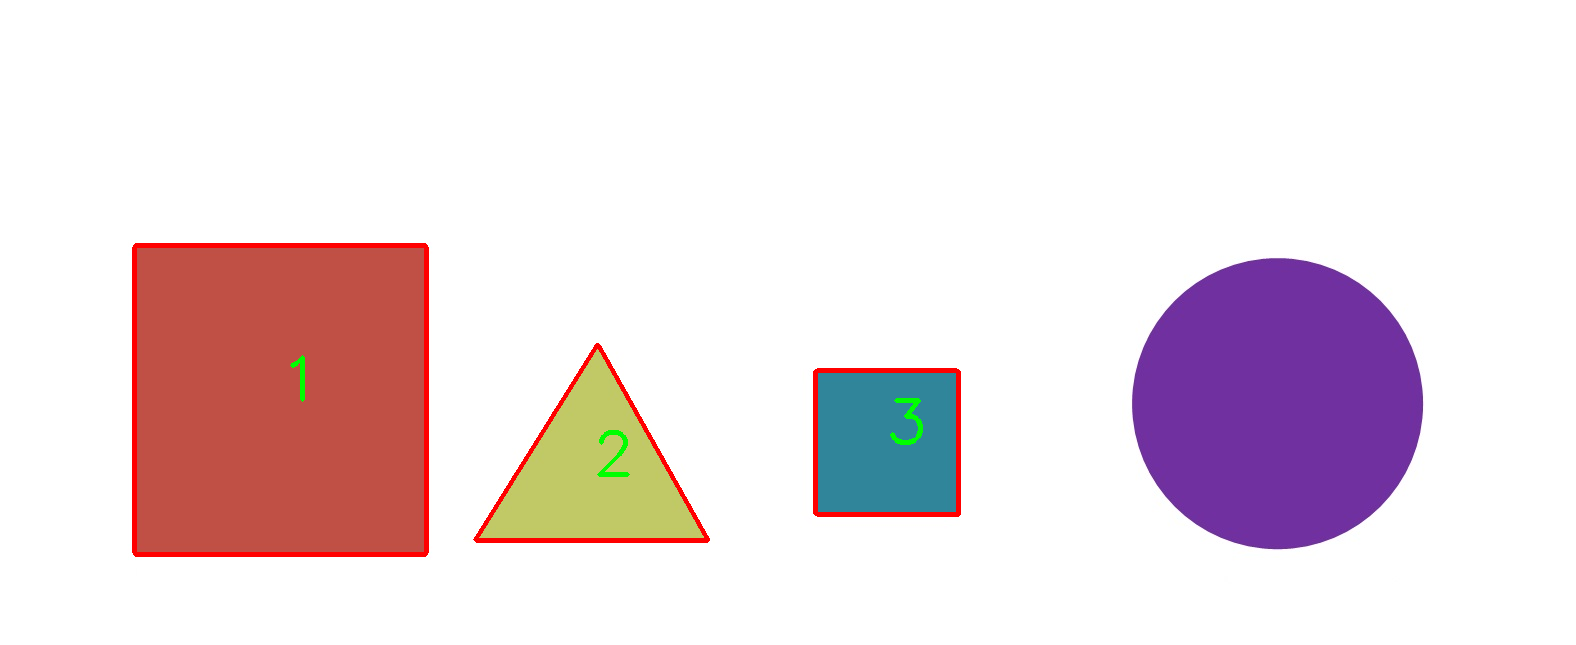

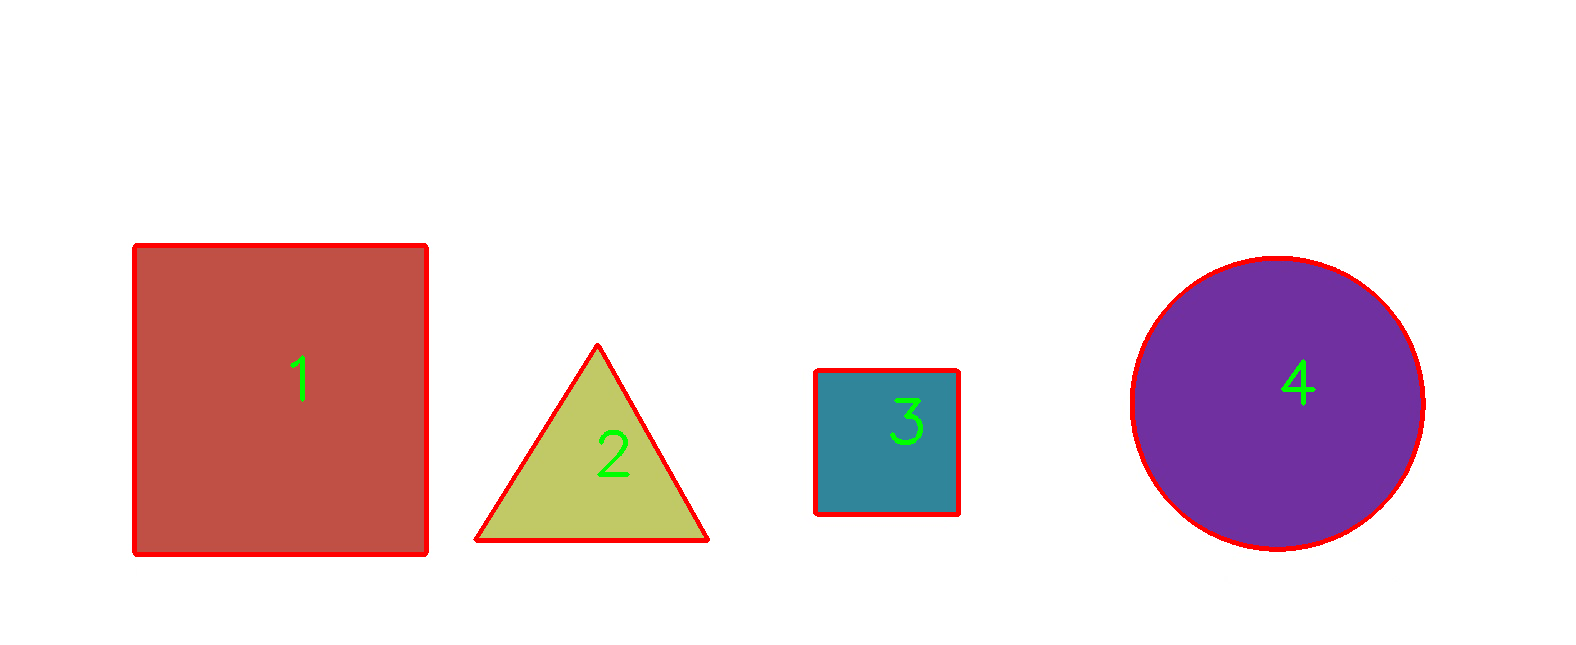

In [26]:
import cv2
import numpy as np

# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

# Load our image
# image = cv2.imread('images/bunchofshapes.jpg')
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/bunchofshapes.jpg')

orginal_image = image.copy()

# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contour):
    orig = label_contour_center(image, c)
 
# Showing the Contour centers
cv2_imshow(image)
cv2.waitKey()

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contour, key = x_cord_contour, reverse = False)


# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2_imshow(orginal_image)
    cv2.waitKey()
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    #cropped_contour = orginal_image[y:y + h, x:x + w]
    #image_name = "output_shape_number_" + str(i+1) + ".jpg"
    #print(image_name)
    #cv2.imwrite(image_name, cropped_contour)
    
cv2.destroyAllWindows()

## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


# Using ApproxPolyDP to approximate contours as a more defined shape
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


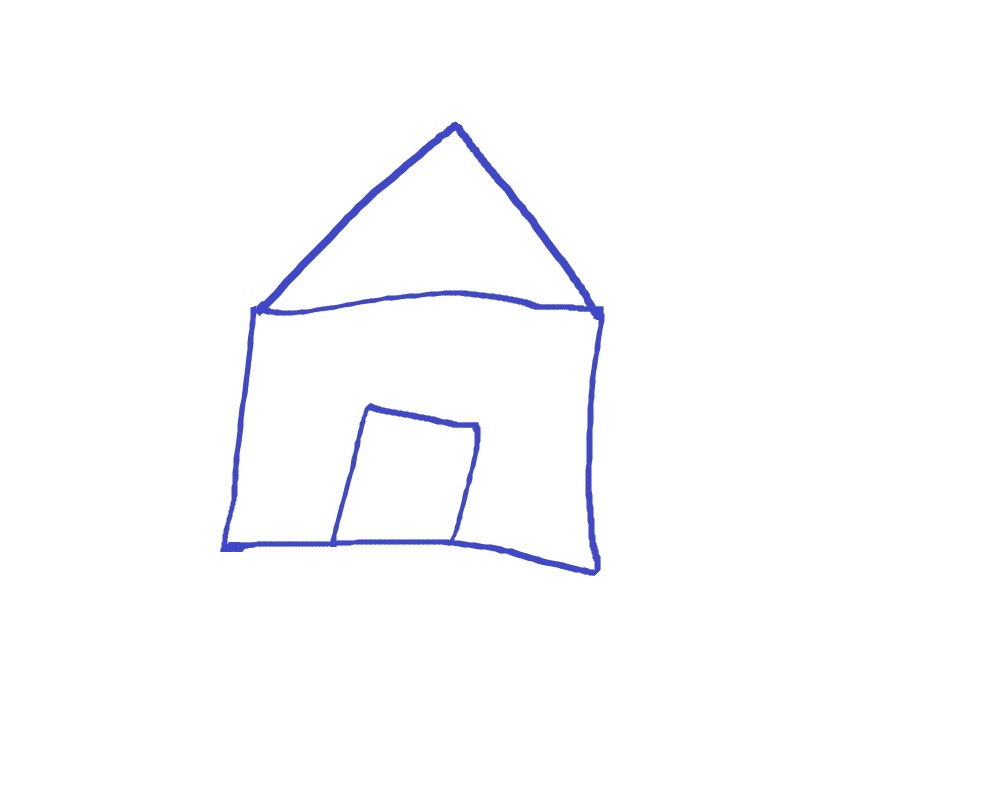

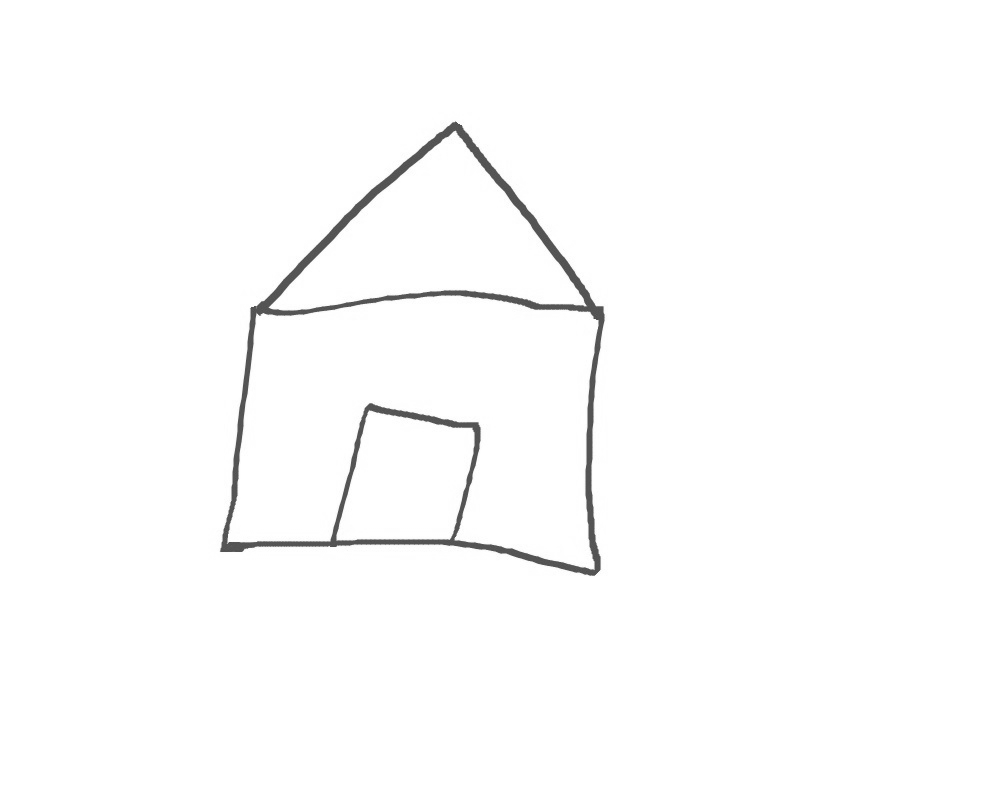

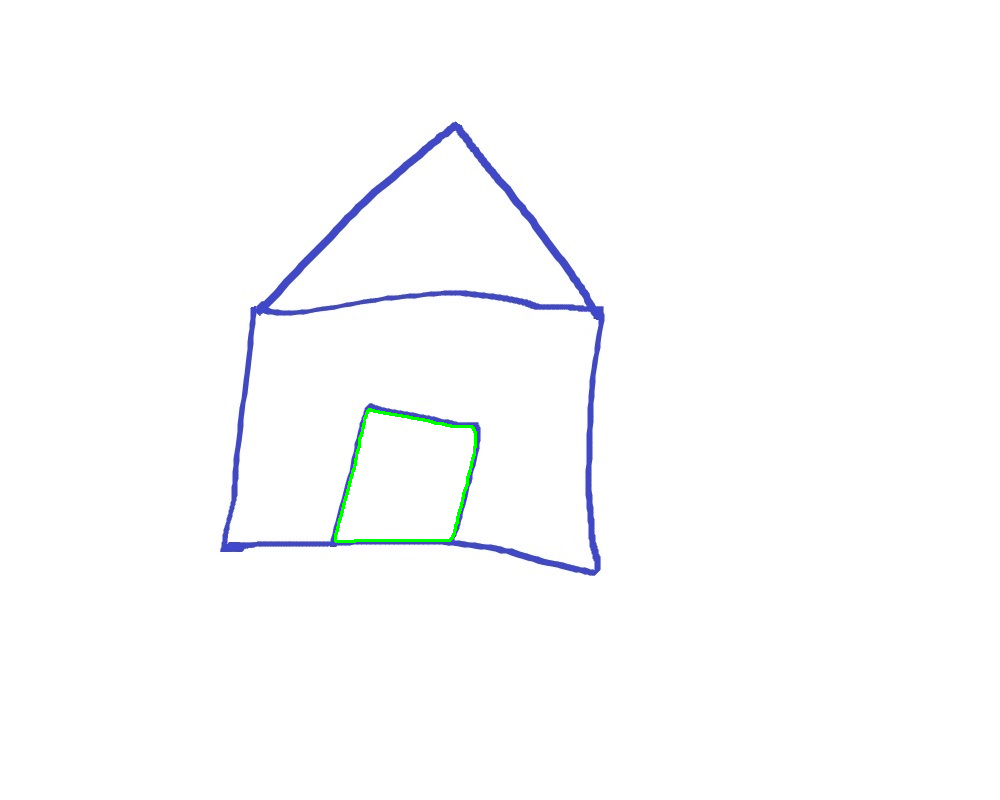

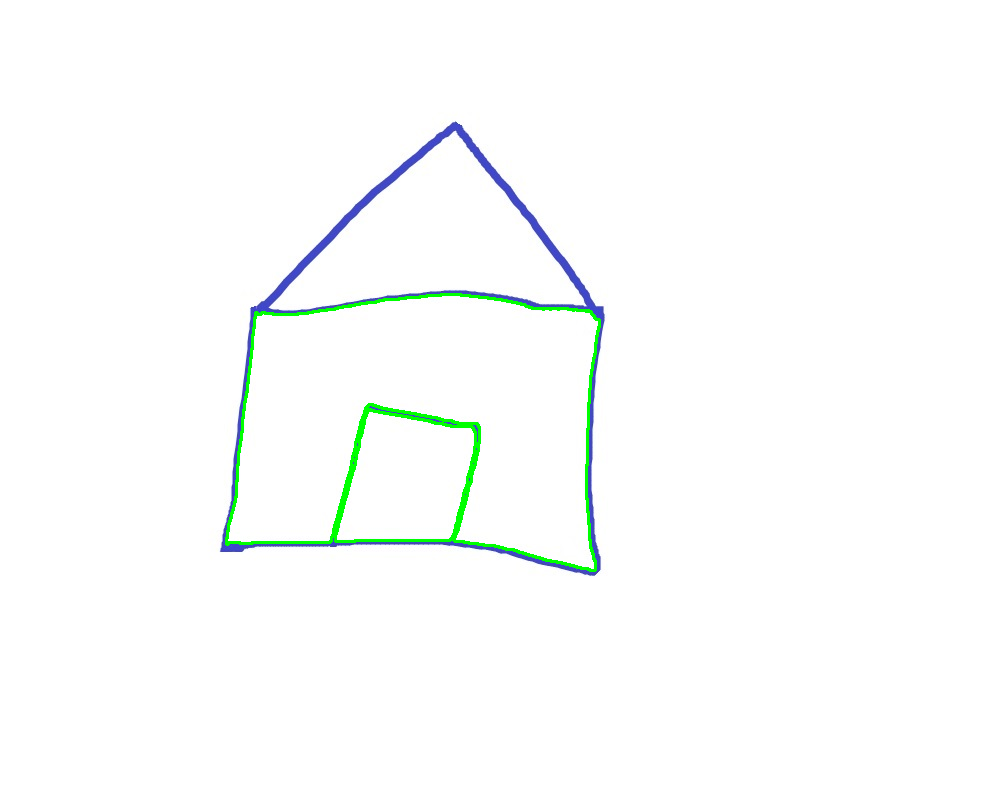

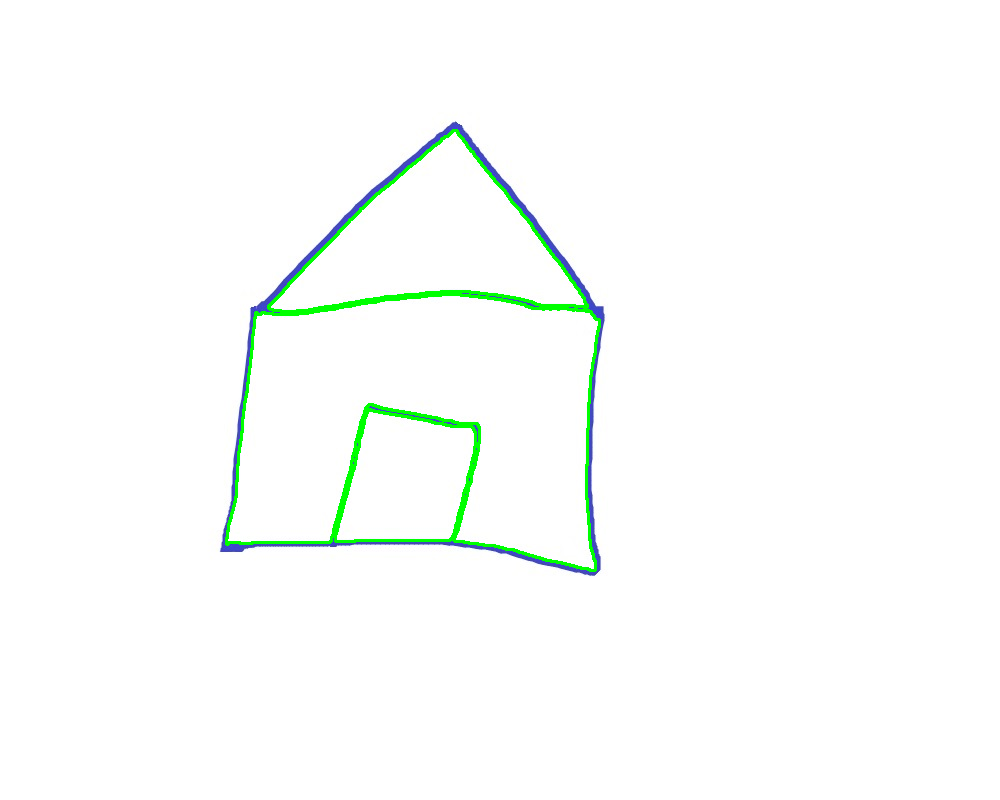

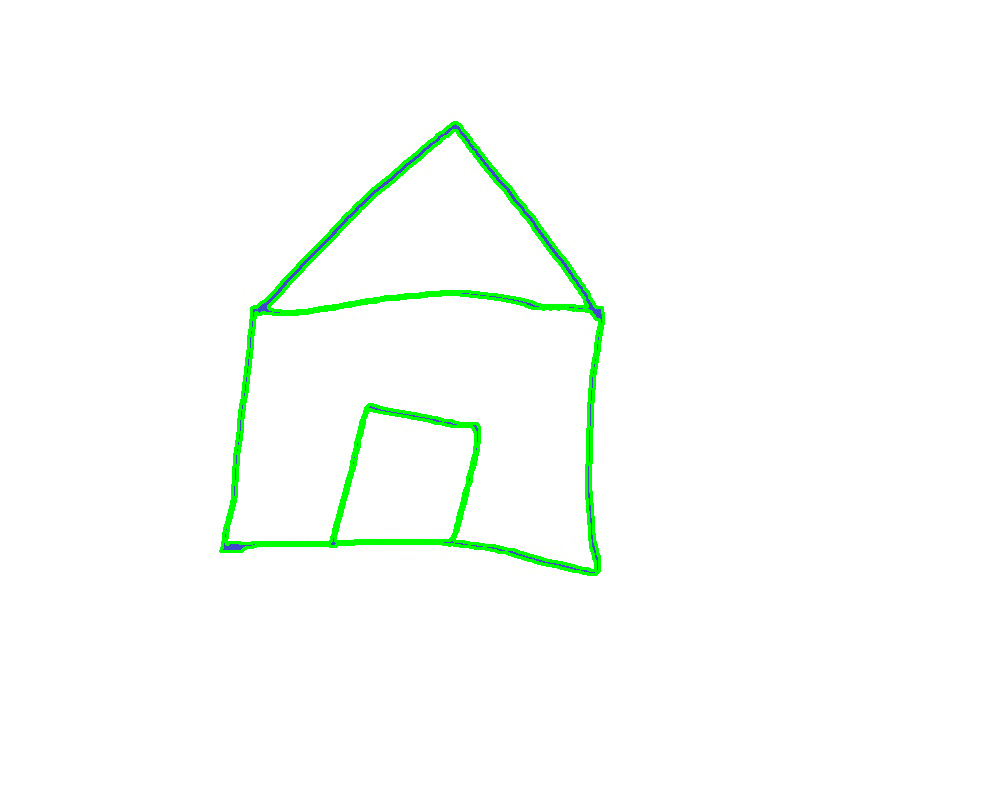

In [34]:
import numpy as np
import cv2

#load image and keep copy
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/house.jpg')
orig_image=image.copy()
cv2_imshow(image)

#grayscale and binarize
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# Iterate through each contour 
for c in contours:
    #x,y,w,h = cv2.boundingRect(c)
    #cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)
    cv2_imshow(image)

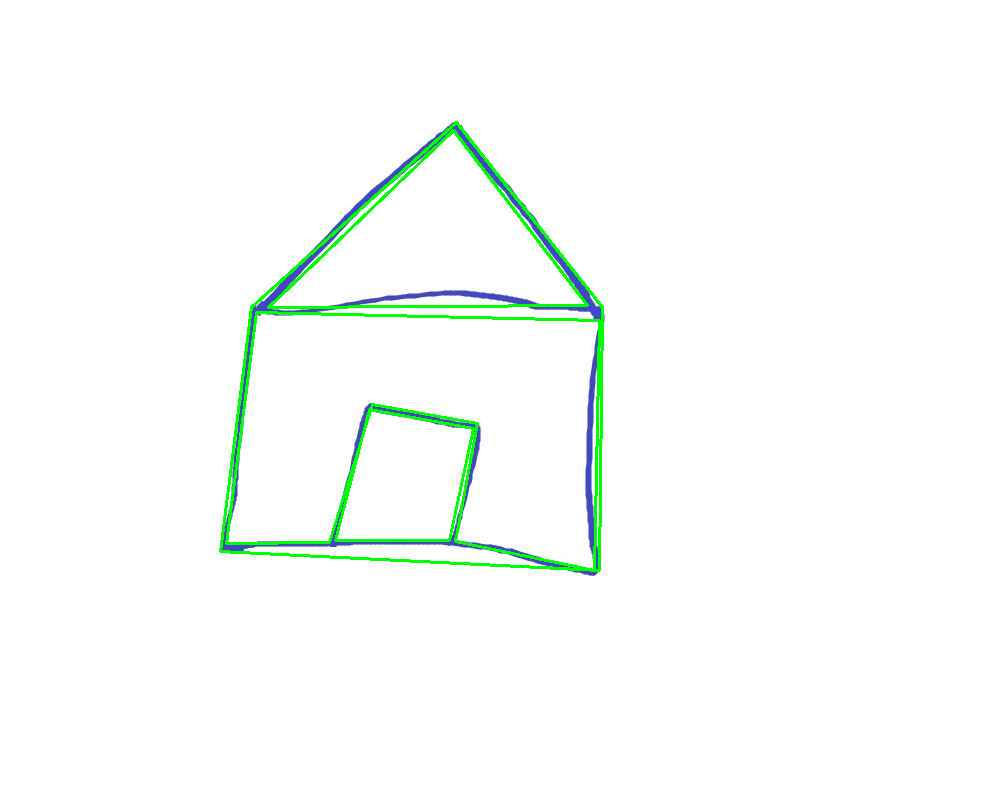

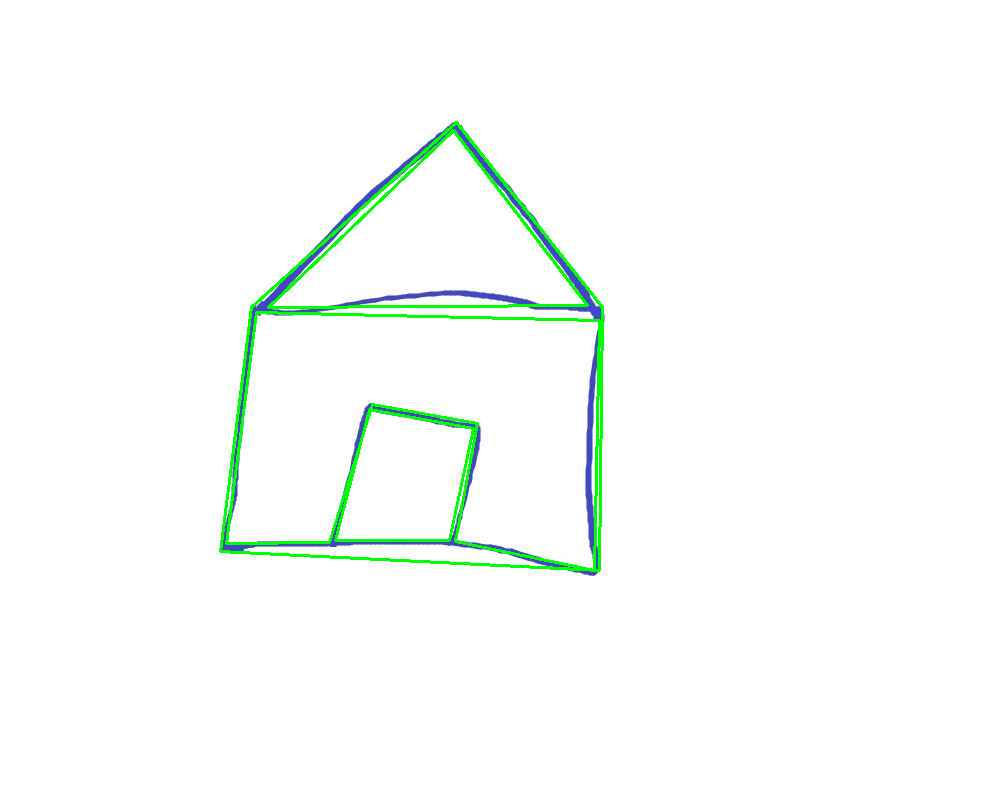

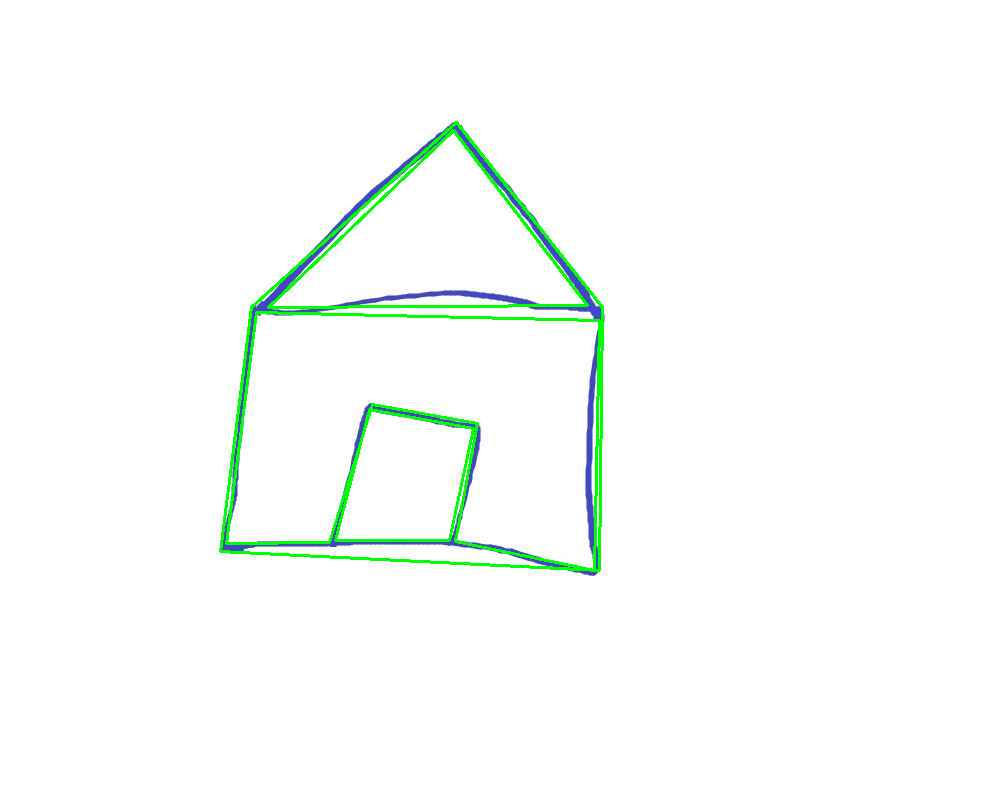

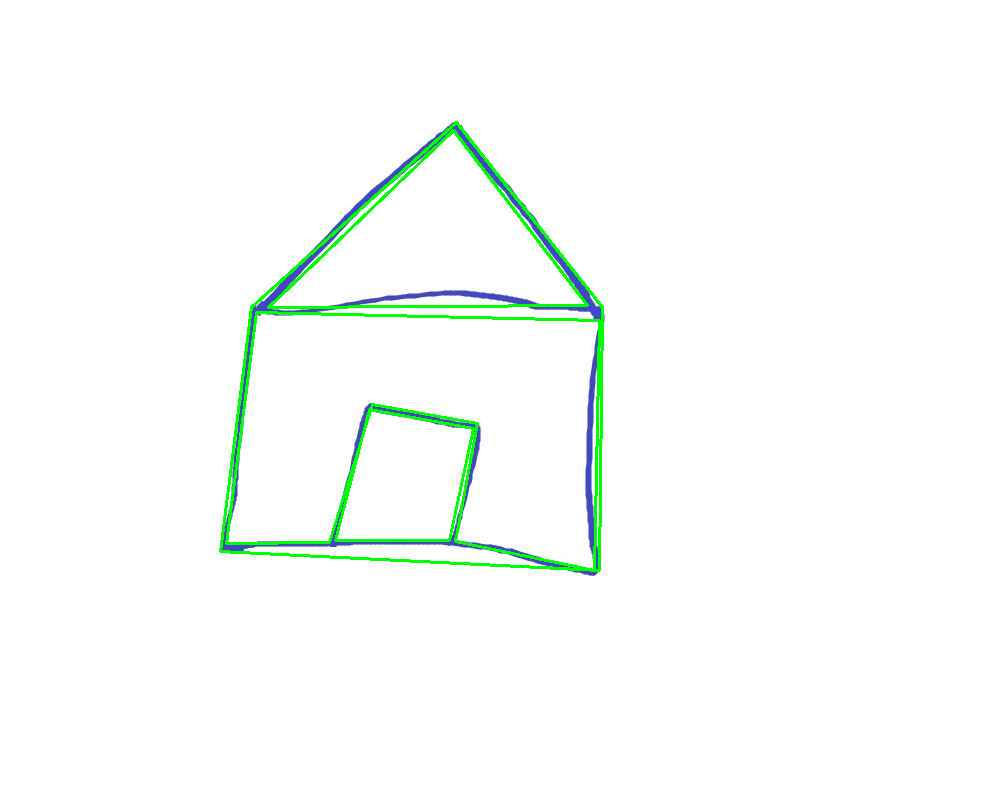

-1

In [37]:
for c in contours:
  accuracy=0.03*cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,accuracy,True)
  cv2.drawContours(copy,[approx],0,(0,255,0),2)
  cv2_imshow(copy)
cv2.waitKey()

In [38]:
# import numpy as np
# import cv2

# # Load image and keep a copy
# image = cv2.imread('images/house.jpg')
# orig_image = image.copy()
# cv2.imshow('Original Image', orig_image)
# cv2.waitKey(0) 

# # Grayscale and binarize
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# # Find contours 
# contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# copy = image.copy()

# # Iterate through each contour 
# for c in contours:
#     #x,y,w,h = cv2.boundingRect(c)
#     #cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
#     cv2.drawContours(image, [c], 0, (0, 255, 0), 2)
#     cv2.imshow('Bounding Rectangle', image)

# cv2.waitKey(0) 

# # Iterate through each contour and compute the approx contour
# for c in contours:
#     # Calculate accuracy as a percent of the contour perimeter
#     accuracy = 0.03 * cv2.arcLength(c, True)
#     approx = cv2.approxPolyDP(c, accuracy, True)
#     cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)
#     cv2.imshow('Approx Poly DP', copy)
    
# cv2.waitKey(0)   
cv2.destroyAllWindows()

## Convex Hull

Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours

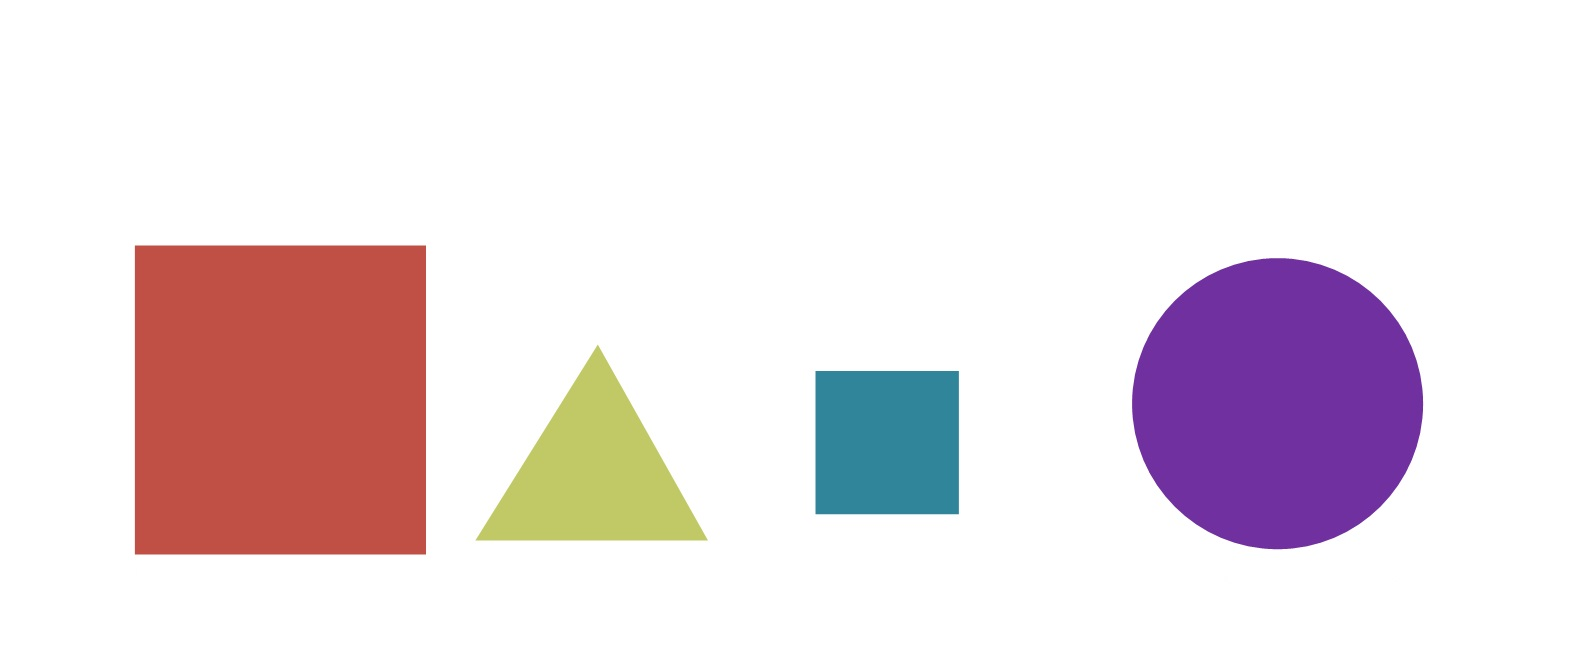

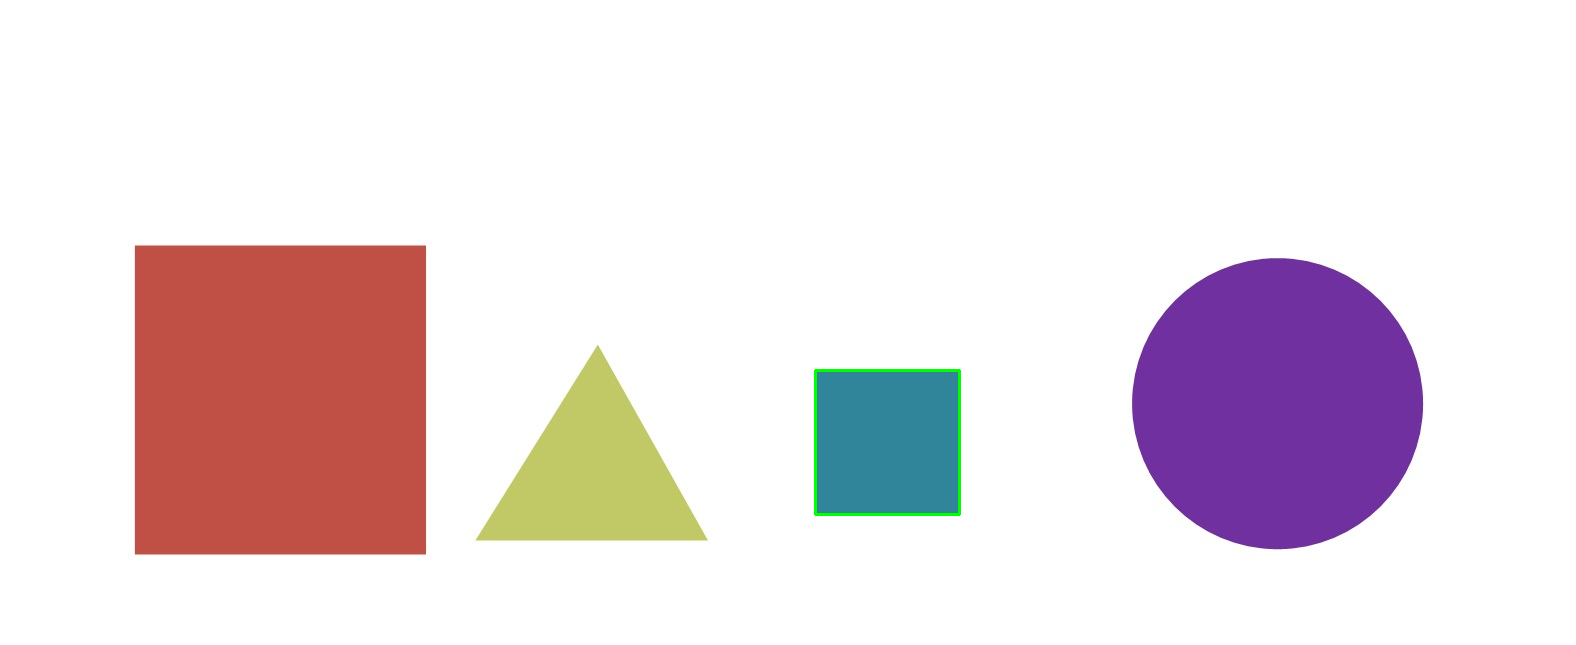

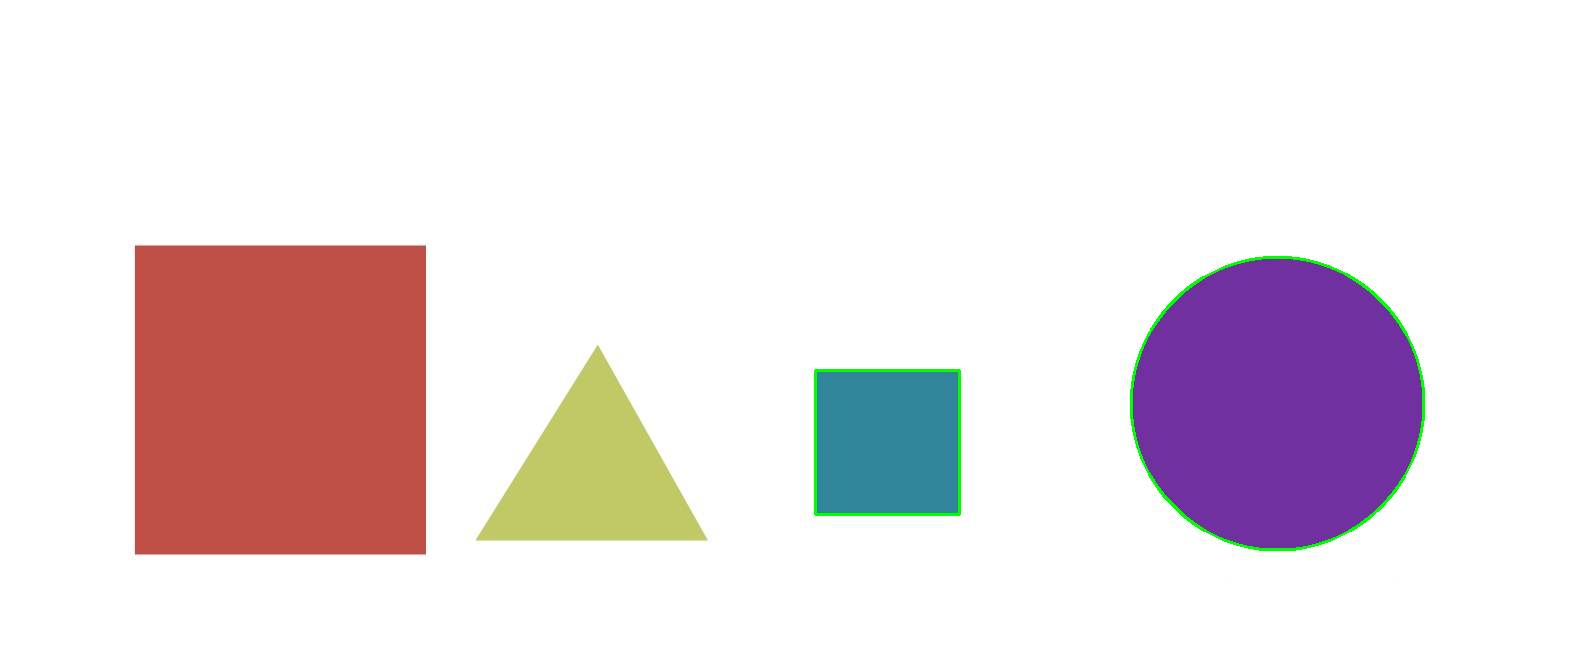

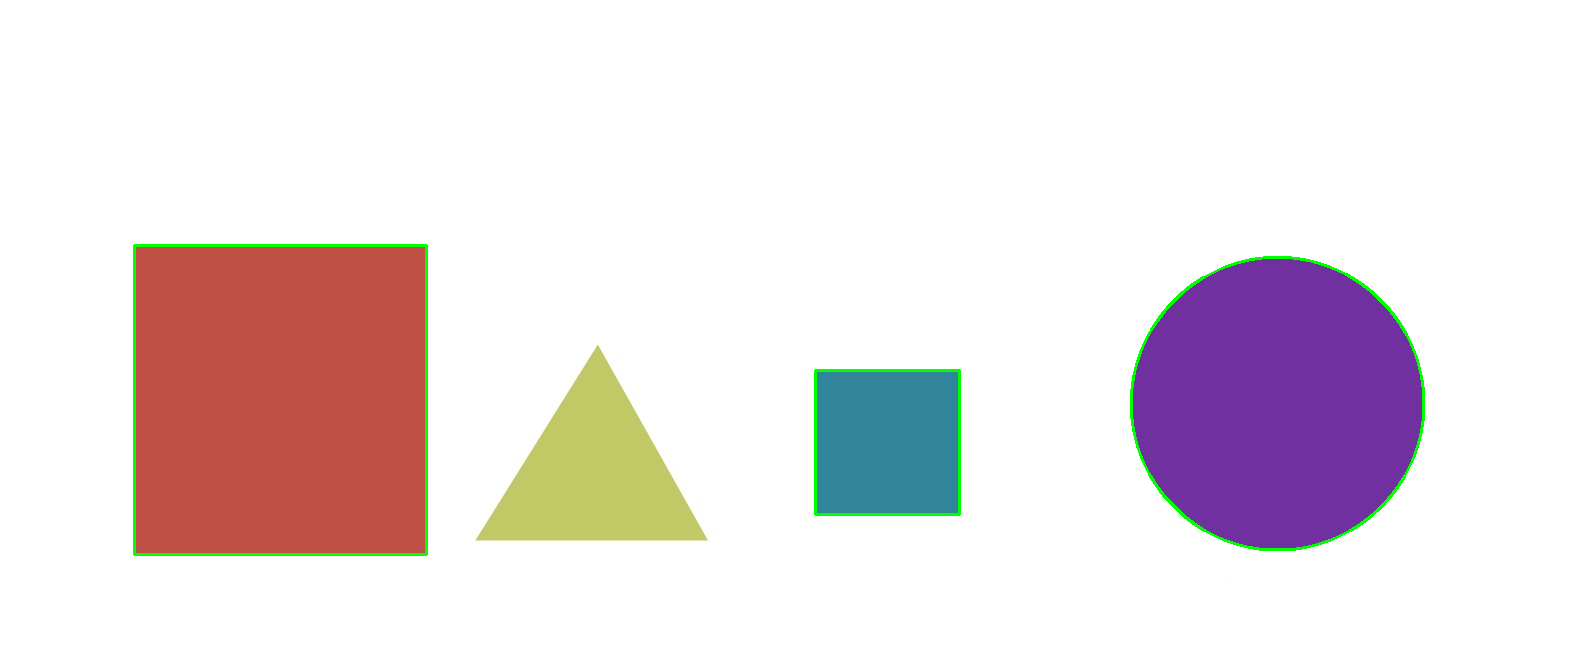

In [41]:
import numpy as np
import cv2

# image = cv2.imread('images/hand.jpg')
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/bunchofshapes.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)
cv2.waitKey() 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    cv2_imshow(image)

cv2.waitKey()    
cv2.destroyAllWindows()